In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
customers_path = 'customers.csv'
transactionsTrain_path = '/Users/jamester/Documents/MachineLearning/KaggleComps/H&M/transactions_train.csv'
articles_path = '/Users/jamester/Documents/MachineLearning/KaggleComps/H&M/articles.csv'

In [41]:
customers_df =  pd.read_csv(customers_path)
transactions_df = pd.read_csv(transactionsTrain_path)
articles_df = pd.read_csv(articles_path)

# EDA

In [42]:
articles_df.head(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


## See sales count by product group, sales by customer - age, zipcode, etc.

In [43]:
gp_counts = articles_df.product_group_name.value_counts()
gp_counts
gp_counts2 = gp_counts[gp_counts > 1000]
#gp_counts2

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


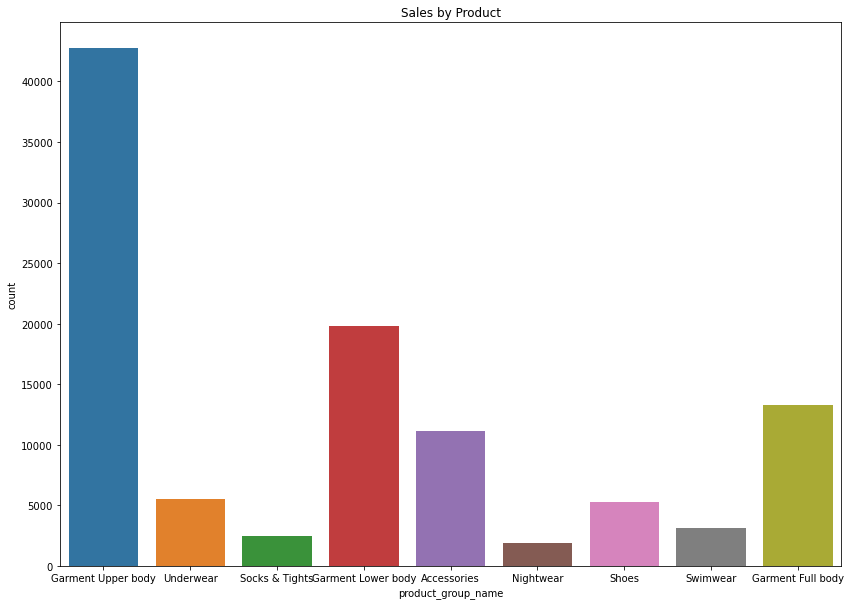

In [46]:
#garment upper body group is very high, maybe break it down more?
gp_counts_large = articles_df[articles_df['product_group_name'].isin(gp_counts2.index)]
plt.figure(figsize = (14, 10))
sns.countplot(gp_counts_large.product_group_name).set(title='Sales by Product');
    


In [67]:
#fill missing detail_desc with prod_name
articles_df.detail_desc.fillna(articles_df['prod_name'], inplace=True)

In [68]:
cols = ['prod_name', 'product_type_name','colour_group_name', 'detail_desc', 'graphical_appearance_name']
articles_df['combined'] = articles_df[cols].astype(str).apply(' '.join, axis=1)

custTrans_df.to_csv('custTrans_df.csv')

<AxesSubplot:>

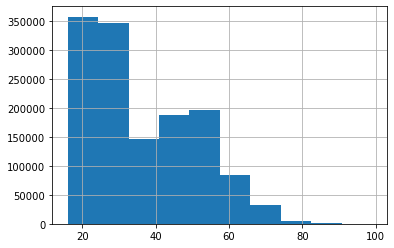

In [107]:
customers_df.age.hist()

In [69]:
custTrans_df = pd.read_csv('custTrans.csv')

In [70]:
custTransSample = custTrans_df.sample(frac=.02)

In [72]:
#cust similar based on both purchasing same item
custTransSample.article_id.value_counts()

706016001    1002
706016002     728
372860001     638
610776002     557
759871002     522
             ... 
639784001       1
608069028       1
641403001       1
718076039       1
578816001       1
Name: article_id, Length: 64985, dtype: int64

In [74]:
art_by_trans = pd.DataFrame(custTransSample.groupby(['t_dat', 'customer_id'])['article_id'].apply(list))

In [75]:
art_by_trans.size

599365

In [76]:
art_by_trans.head()

article_id
t_dat      customer_id                                                    
2018-09-20 000aa7f0dc06cd7174389e76c9e132a67860c5f65f97069...  [676827002]
           01c3653cafdd569ef34e36810d1c1bda71c0d425e568278...  [630672001]
           01ef5256e6264e9d50b11a08e9cfb2f2291324fedb4140c...  [660497003]
           01f040495565a44cbee048d8a0340fe1ba46243565d634a...  [619506001]
           01fbe7968ede05b116c4d878d47ed4fd33db355c4b3311c...  [650578001]

In [77]:
purchase_amt_by_trans = pd.DataFrame(custTransSample.groupby(['t_dat', 'customer_id'])['price'].sum())

In [78]:
purchase_amt_by_trans.size

599365

In [79]:
len(purchase_amt_by_trans)

599365

In [80]:
purchase_amt_by_trans.reset_index().customer_id.nunique()

372254

In [81]:
purchase_amt_by_trans.head()

price
t_dat      customer_id                                                 
2018-09-20 000aa7f0dc06cd7174389e76c9e132a67860c5f65f97069...  0.042356
           01c3653cafdd569ef34e36810d1c1bda71c0d425e568278...  0.033881
           01ef5256e6264e9d50b11a08e9cfb2f2291324fedb4140c...  0.008458
           01f040495565a44cbee048d8a0340fe1ba46243565d634a...  0.013542
           01fbe7968ede05b116c4d878d47ed4fd33db355c4b3311c...  0.006763

In [82]:
amtAndArticles = art_by_trans.merge(purchase_amt_by_trans, on=['customer_id', 't_dat'])

In [83]:
amtAndArticles.size

1198730

In [84]:
amtAndArticles.reset_index(inplace=True)

In [85]:
amtAndArticles.customer_id.nunique()

372254

In [86]:
amtAndArticles.head(1)

,customer_id,t_dat,article_id,price
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,2018-09-20,[676827002],0.042356


In [87]:
newTrans_df = amtAndArticles.merge(custTransSample, how='left', on=['t_dat', 'customer_id'])

In [88]:
newTrans_df.size

8264958

In [89]:
newTrans_df.head(1)

,customer_id,t_dat,article_id_x,price_x,article_id_y,price_y,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,2018-09-20,[676827002],0.042356,676827002,0.042356,2,NaN,NaN,ACTIVE,NONE,22.0,6d98a3ca1370c33de04f4a0c2e81cd9c9e36d9501ca6dc...


In [90]:
newTrans_df[newTrans_df['article_id_x'].map(len) > 2].head(3)

,customer_id,t_dat,article_id_x,price_x,article_id_y,price_y,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
167,2e92e09284188387ce89fcb88e9b6954810cb2592ddaad...,2018-09-20,"[667985001, 653590001, 551379001]",0.18639,667985001,0.033881,2,1.0,1.0,ACTIVE,Regularly,46.0,8d7ce90d7fed2b9cf7af40cbb9ec6fbad1d2b513414efc...
168,2e92e09284188387ce89fcb88e9b6954810cb2592ddaad...,2018-09-20,"[667985001, 653590001, 551379001]",0.18639,653590001,0.101678,2,1.0,1.0,ACTIVE,Regularly,46.0,8d7ce90d7fed2b9cf7af40cbb9ec6fbad1d2b513414efc...
169,2e92e09284188387ce89fcb88e9b6954810cb2592ddaad...,2018-09-20,"[667985001, 653590001, 551379001]",0.18639,551379001,0.050831,2,1.0,1.0,ACTIVE,Regularly,46.0,8d7ce90d7fed2b9cf7af40cbb9ec6fbad1d2b513414efc...


In [91]:
newTrans = newTrans_df.drop(['article_id_y', 'price_y'], axis=1)

In [92]:
newTrans.head(1)

,customer_id,t_dat,article_id_x,price_x,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,2018-09-20,[676827002],0.042356,2,NaN,NaN,ACTIVE,NONE,22.0,6d98a3ca1370c33de04f4a0c2e81cd9c9e36d9501ca6dc...


In [93]:
newTrans.rename(columns = {'article_id_x':'article_id', 'price_x':'price'}, inplace=True)

In [94]:
newTrans.head(1)

,customer_id,t_dat,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,2018-09-20,[676827002],0.042356,2,NaN,NaN,ACTIVE,NONE,22.0,6d98a3ca1370c33de04f4a0c2e81cd9c9e36d9501ca6dc...


In [95]:
len(newTrans.groupby(['t_dat', 'customer_id']).count())

599365

# Customer Age Distributions

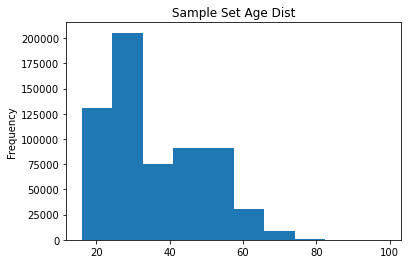

In [96]:
ax = newTrans.age.plot.hist();
ax.set_title('Sample Set Age Dist');

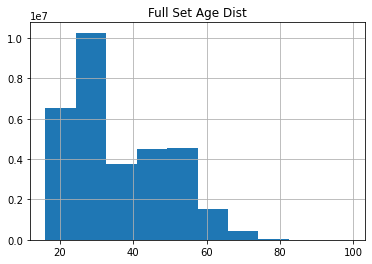

In [97]:
#graph for entire dataset - has 40-45 year olds more similar to number of 50-55yr olds. 
#Sample shows 40-45 year olds more similar to number of 35-40 year olds

ax = custTrans_df.age.hist();
ax.set_title('Full Set Age Dist');


In [98]:
newTrans['bin'] = pd.cut(newTrans['age'], bins=30)

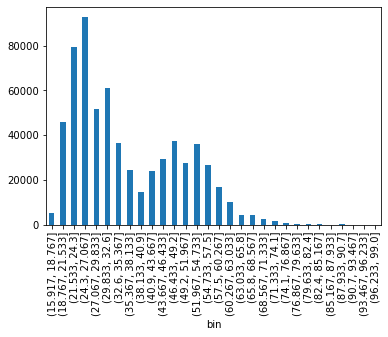

In [99]:
newTrans.groupby('bin').bin.count().plot(kind='bar');

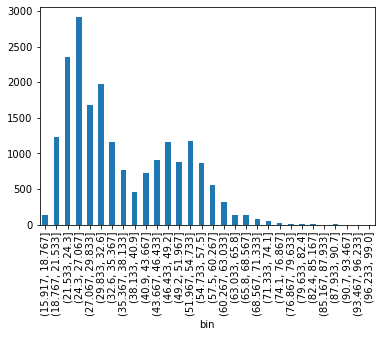

In [100]:
newTrans.groupby('bin').price.sum().plot(kind='bar');

In [101]:
pd.to_datetime(newTrans.t_dat)

0        2018-09-20
1        2018-09-20
2        2018-09-20
3        2018-09-20
4        2018-09-20
            ...    
635761   2020-09-22
635762   2020-09-22
635763   2020-09-22
635764   2020-09-22
635765   2020-09-22
Name: t_dat, Length: 635766, dtype: datetime64[ns]

In [102]:
newTrans['Day'] = newTrans['t_dat'].dt.day_name()

AttributeError: Can only use .dt accessor with datetimelike values

In [103]:
newTrans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635766 entries, 0 to 635765
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   customer_id             635766 non-null  object  
 1   t_dat                   635766 non-null  object  
 2   article_id              635766 non-null  object  
 3   price                   635766 non-null  float64 
 4   sales_channel_id        635766 non-null  int64   
 5   FN                      271461 non-null  float64 
 6   Active                  267359 non-null  float64 
 7   club_member_status      634529 non-null  object  
 8   fashion_news_frequency  632888 non-null  object  
 9   age                     632947 non-null  float64 
 10  postal_code             635766 non-null  object  
 11  bin                     632947 non-null  category
dtypes: category(1), float64(4), int64(1), object(6)
memory usage: 58.8+ MB


In [ ]:
newTrans.groupby('customer', 'age').

# use cosine similarity to see similarity btwn product_group_name
Make recomendations based on that compared to previouse purchases

# create list of dataframes for each product_group_name

In [47]:
#create list of dataframes for each product_group_name
def create_dfList(group_list, df):
    df_dict = {}
    for i in group_list:
        df_dict[i+'_df'] = df[df['product_group_name'] == i]
    return df_dict


In [48]:
newDic = create_dfList(groupNameList, articles_df)
newDic['Accessories_df']['combined']

28        2p Claw Hair clip Black Plastic hair claws. Wi...
29        2p Claw Hair clip Greyish Beige Plastic hair c...
30        2p Claw Hair clip Light Orange Plastic hair cl...
31        2p Claw Hair clip Silver Plastic hair claws. W...
32        2p Claw Hair clip Gold Plastic hair claws. Wid...
                                ...                        
105517    PQ Ingrid Longtip Belt Yellowish Brown Narrow ...
105518    Cool Spiky earcuff pk Earring Silver Set with ...
105519    Flirty Fries earcuff pk Earring Gold Set with ...
105533    Compact brush Fancy Other accessories Other Pi...
105540    CLAIRE HAIR CLAW Hair clip Black Large plastic...
Name: combined, Length: 11158, dtype: object

# create Tfidf vectors for each product_group_name

In [49]:
#create Tfidf vectors for each product_group_name
from sklearn.feature_extraction.text import TfidfVectorizer
def createTfidfTables(dfDict):
    tfidf_dict = {}
    vectorizer = TfidfVectorizer(min_df=2)
    for s in dfDict:
        vectorizer_data = vectorizer.fit_transform(dfDict[s]['combined'])
        tfidf_dict[s+'_tdif'] = pd.DataFrame(vectorizer_data.toarray(), columns=vectorizer.get_feature_names())
        tfidf_dict[s+'_tdif'].index = dfDict[s]['article_id']
    return tfidf_dict

In [50]:
tfidf_group_dfDic = createTfidfTables(newDic)

In [52]:
#run cosine similarity without cleaning up the results first
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_array = cosine_similarity(tfidf_group_dfDic['Accessories_df_tdif'])

In [53]:
cosine_sim_df = pd.DataFrame(cosine_sim_array, index=tfidf_group_dfDic['Accessories_df_tdif'].index, columns=tfidf_group_dfDic['Accessories_df_tdif'].index)

In [54]:
cosine_sim_df.head()

article_id,126589006,126589007,126589010,126589011,126589012,146721001,146721002,176754001,176754003,176754019,...,946507001,946507002,946527001,947235001,947253001,947509001,947528001,947538001,950449002,957375001
article_id,,,,,,,,,,,,,,,,,,,,,
126589006,1.000000,0.813728,0.890322,0.903653,0.915251,0.301214,0.299476,0.099852,0.071646,0.073475,...,0.004379,0.004365,0.005562,0.225315,0.175369,0.043559,0.004920,0.005356,0.059002,0.634664
126589007,0.813728,1.000000,0.756191,0.767514,0.777365,0.250834,0.249387,0.057866,0.055222,0.056632,...,0.000000,0.000000,0.000000,0.188953,0.116508,0.032124,0.000000,0.000000,0.046095,0.512824
126589010,0.890322,0.756191,1.000000,0.918769,0.930561,0.274444,0.272861,0.063313,0.060420,0.137472,...,0.000000,0.000000,0.000000,0.206738,0.127475,0.035148,0.000000,0.000000,0.050433,0.561094
126589011,0.903653,0.767514,0.918769,1.000000,0.944494,0.278553,0.322551,0.064261,0.061325,0.062890,...,0.000000,0.034006,0.000000,0.232006,0.129383,0.035674,0.038325,0.000000,0.051189,0.569496
126589012,0.915251,0.777365,0.930561,0.944494,1.000000,0.311247,0.280501,0.065086,0.062112,0.063697,...,0.021657,0.000000,0.000000,0.212527,0.131044,0.036132,0.000000,0.026489,0.051846,0.576805


# use cosine similarity to find items most similar within each product grouping

In [55]:
#pd.set_option(‘display.max_rows’, 134)
df_sum = tfidf_group_dfDic['Accessories_df_tdif'].sum(axis=0)
df_sum

10          33.057065
100          2.214164
100x180      0.599737
100x200      4.706925
10p          5.013915
              ...    
zips         3.455678
zitta       10.148316
zlideon      0.675236
zoe          3.905784
örhängen     0.997825
Length: 3588, dtype: float64

In [57]:
tfidf_trousers = articles_df[articles_df['product_group_name']=='Accessories']
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.7, min_df=2)
vectorizer_data = vectorizer.fit_transform(tfidf_trousers['combined'])

In [58]:
tfidf_df_trousers = pd.DataFrame(vectorizer_data.toarray(), columns=vectorizer.get_feature_names())
tfidf_df_trousers.index = tfidf_trousers['article_id']

In [59]:
from scipy import sparse
import numpy as np
from scipy.sparse import csr_matrix
cosine_similarity_array = cosine_similarity(tfidf_df_trousers)

In [60]:
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=tfidf_df_trousers.index, columns=tfidf_df_trousers.index)


In [61]:
cosine_similarity_df

article_id,126589006,126589007,126589010,126589011,126589012,146721001,146721002,176754001,176754003,176754019,...,946507001,946507002,946527001,947235001,947253001,947509001,947528001,947538001,950449002,957375001
article_id,,,,,,,,,,,,,,,,,,,,,
126589006,1.000000,0.813728,0.890322,0.903653,0.915251,0.301214,0.299476,0.100064,0.071785,0.073624,...,0.004379,0.004365,0.005593,0.225395,0.175369,0.043622,0.004941,0.005383,0.059060,0.634664
126589007,0.813728,1.000000,0.756191,0.767514,0.777365,0.250834,0.249387,0.057989,0.055329,0.056747,...,0.000000,0.000000,0.000000,0.189020,0.116508,0.032170,0.000000,0.000000,0.046140,0.512824
126589010,0.890322,0.756191,1.000000,0.918769,0.930561,0.274444,0.272861,0.063447,0.060537,0.137751,...,0.000000,0.000000,0.000000,0.206811,0.127475,0.035198,0.000000,0.000000,0.050483,0.561094
126589011,0.903653,0.767514,0.918769,1.000000,0.944494,0.278553,0.322551,0.064397,0.061443,0.063018,...,0.000000,0.034006,0.000000,0.232088,0.129383,0.035725,0.038489,0.000000,0.051239,0.569496
126589012,0.915251,0.777365,0.930561,0.944494,1.000000,0.311247,0.280501,0.065223,0.062232,0.063827,...,0.021657,0.000000,0.000000,0.212602,0.131044,0.036184,0.000000,0.026623,0.051896,0.576805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947509001,0.043622,0.032170,0.035198,0.035725,0.036184,0.022129,0.022002,0.028022,0.119094,0.027422,...,0.071044,0.070817,0.088120,0.060844,0.045076,1.000000,0.065495,0.067925,0.007892,0.004230
947528001,0.004941,0.000000,0.000000,0.038489,0.000000,0.051727,0.077443,0.036372,0.034704,0.035593,...,0.738297,0.755330,0.081811,0.065009,0.013693,0.065495,1.000000,0.627876,0.022155,0.003638
947538001,0.005383,0.000000,0.000000,0.000000,0.026623,0.065323,0.047180,0.029100,0.027765,0.028476,...,0.502502,0.487645,0.053232,0.038828,0.009911,0.067925,0.627876,1.000000,0.024141,0.003964


In [62]:
cosine_sim_series = cosine_similarity_df.loc[126589006]
ordered_sim = cosine_sim_series.sort_values(ascending=False)

In [63]:
ordered_sim

article_id
126589006    1.000000
736213001    1.000000
126589012    0.915251
126589011    0.903653
126589010    0.890322
               ...   
804560001    0.000000
731527001    0.000000
804556001    0.000000
731528001    0.000000
710695014    0.000000
Name: 126589006, Length: 11158, dtype: float64

In [64]:
articles_df[(articles_df['article_id']==736213001)|(articles_df['article_id']==126589006)]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,combined
28,126589006,126589,2p Claw,72,Hair clip,Accessories,1010016,Solid,9,Black,...,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Plastic hair claws. Width 3.5 cm.,2p Claw Hair clip Black Plastic hair claws. Wi...
62423,736213001,736213,2p claw 2,72,Hair clip,Accessories,1010016,Solid,9,Black,...,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Plastic hair claws. Width 3.5 cm.,2p claw 2 Hair clip Black Plastic hair claws. ...


newTrans.groupby('Day').bin.count().plot(kind='bar');